In [101]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

###  handlin missing  data
from sklearn.impute import SimpleImputer

### libraries for feature selection 
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2, f_regression, f_classif
from sklearn.feature_selection import SelectKBest

In [2]:
#Importing data

dataset = pd.read_excel('ML_Data_Return_Updated_Repeat.xlsx', na_values   = "?")
dataset

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,QTY,...,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,1,1140,17592,1,NaN,7,2021-01-23,8,4482,325.0,...,C2,L2,NO,2,2022Q3,4,0,YES,C,176
1,2,1140,17899,1,NaN,7,2021-05-01,1,4486,2860.0,...,C2,L2,NO,2,2022Q3,9,0,YES,C,176
2,3,1320,18072,0,NL,2,2021-06-26,77,4440,39.0,...,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,340,18181,1,US,2,2021-08-02,11,4440,80.6,...,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,1100,18335,1,DE,7,2021-09-13,2,4481,325.0,...,C6,L9,NO,3,2022Q4,12,0,No,C,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,340,19580,1,US,25,2022-12-04,3,4493,1.3,...,C7,L8,YES,1,2022Q3,1,0,No,NaN,684
15886,15887,340,19580,1,US,21,2022-12-04,1,4493,10.4,...,C12,L12,NO,1,2022Q3,1,0,No,NaN,684
15887,15888,340,19580,1,US,17,2022-12-04,4,4467,11.7,...,C12,L12,NO,1,2022Q3,1,0,No,NaN,684
15888,15889,340,19580,1,US,17,2022-12-04,4,4467,11.7,...,C12,L12,NO,1,2022Q3,1,0,No,NaN,684


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15890 entries, 0 to 15889
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Record         15890 non-null  int64         
 1   ID                15890 non-null  int64         
 2   Entry ID          15890 non-null  int64         
 3   Strategic Sale    15890 non-null  int64         
 4   Destination       15186 non-null  object        
 5   Group             15890 non-null  int64         
 6   Date              15890 non-null  datetime64[ns]
 7   Sequence          15890 non-null  int64         
 8   Product           15890 non-null  int64         
 9   QTY               15890 non-null  float64       
 10  Total Value       15638 non-null  float64       
 11  Unit Price        15666 non-null  float64       
 12  Planned Date      15890 non-null  datetime64[ns]
 13  Delivered Date    15571 non-null  datetime64[ns]
 14  TYPE              1589

In [29]:
dataset_copy = dataset.copy()

In [30]:
dataset_copy.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
QTY                   0
Total Value         252
Unit Price          224
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered       319
Order Source          0
Logistic Partner      0
Deposit               0
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                 429
Customer Group        0
dtype: int64

In [6]:
#### CLEANING DATA - DROPPING ALL Null data

In [31]:
dataset_clean = dataset_copy.dropna()

dataset_clean.isnull().sum()

ID_Record           0
ID                  0
Entry ID            0
Strategic Sale      0
Destination         0
Group               0
Date                0
Sequence            0
Product             0
QTY                 0
Total Value         0
Unit Price          0
Planned Date        0
Delivered Date      0
TYPE                0
Qty Delivered       0
Order Source        0
Logistic Partner    0
Deposit             0
Replacement         0
Market Demand       0
Quarter             0
Week                0
Strateg Prod        0
Strat Customer      0
ABC                 0
Customer Group      0
dtype: int64

In [8]:
### describe the dataset and visualise - descriptive statistics 

In [32]:
dataset_clean

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,QTY,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
2,3,1320,18072,0,NL,2,2021-06-26,77,4440,39.0,214.20,5.492308,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,340,18181,1,US,2,2021-08-02,11,4440,80.6,442.68,5.492308,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,1100,18335,1,DE,7,2021-09-13,2,4481,325.0,622.50,1.915385,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
5,6,1320,18378,0,NL,2,2021-09-27,31,4440,650.0,3570.00,5.492308,2023-08-12,2023-08-20,SALE,500.0,Channel2,C6,L9,NO,3,2022Q1,4,0,No,C,3986
6,7,1320,18397,0,NL,2,2021-10-04,1,4452,128.7,1906.74,14.815385,2021-11-20,2023-05-21,SALE,99.0,Channel2,C6,L9,NO,3,2022Q3,10,0,No,C,3986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,15862,1320,19418,0,NL,2,2022-10-04,1,4440,6.5,35.70,5.492308,2022-10-04,2023-04-18,SALE,5.0,Channel2,C7,L8,YES,3,2022Q3,7,0,No,C,3986
15862,15863,340,19418,1,US,21,2022-10-04,1,4493,11.7,28.80,2.461538,2022-10-04,2023-02-22,SALE,9.0,Channel2,C2,L2,NO,1,2022Q3,12,0,No,B,684
15863,15864,1320,19418,0,NL,2,2022-10-05,2,4440,195.0,1071.00,5.492308,2022-10-05,2023-03-28,SALE,150.0,Channel2,C7,L8,YES,3,2022Q3,7,0,No,C,3986
15864,15865,1320,19420,0,NL,14,2022-10-22,2,4468,14.3,89.54,6.261538,2022-10-22,2023-01-01,SALE,11.0,Channel2,C6,L9,NO,3,2022Q3,2,0,No,C,3986


In [33]:
pd.set_option('display.max_columns', None)
dataset_clean.describe()

,ID_Record,ID,Entry ID,Strategic Sale,Group,Sequence,Product,QTY,Total Value,Unit Price,Qty Delivered,Market Demand,Week,Strateg Prod,Customer Group
count,14119.000000,14119.000000,14119.000000,14119.000000,14119.000000,14119.000000,14119.000000,14119.000000,14119.000000,14119.000000,14119.00000,14119.000000,14119.000000,14119.0,14119.000000
mean,7827.247043,997.706636,19954.022169,0.425313,14.176146,22.533607,4475.162830,71.893250,668.226924,8.417423,55.30250,2.065373,7.451590,0.0,2109.129046
std,4441.390737,413.929009,231.901338,0.494408,9.349356,53.724080,14.618622,368.953819,4826.093900,10.425980,283.81063,0.997896,3.917124,0.0,1547.531198
min,3.000000,340.000000,18072.000000,0.000000,2.000000,1.000000,4440.000000,1.300000,0.080000,0.061538,1.00000,1.000000,1.000000,0.0,200.000000
25%,4088.500000,340.000000,19784.000000,0.000000,3.000000,2.000000,4464.000000,2.600000,10.780000,2.638462,2.00000,1.000000,4.000000,0.0,684.000000
50%,7734.000000,1100.000000,19966.000000,0.000000,16.000000,5.000000,4474.000000,7.800000,41.480000,4.146154,6.00000,3.000000,8.000000,0.0,1420.000000
75%,11588.500000,1320.000000,20138.000000,1.000000,21.000000,18.000000,4492.000000,26.000000,179.815000,6.430769,20.00000,3.000000,11.000000,0.0,3986.000000
max,15866.000000,1500.000000,20374.000000,1.000000,29.000000,730.000000,4502.000000,14690.000000,214688.640000,42.884615,11300.00000,3.000000,13.000000,0.0,3986.000000


In [10]:
    pip install missingno


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: /Users/jasondonohoe/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import missingno as msno

<Axes: >

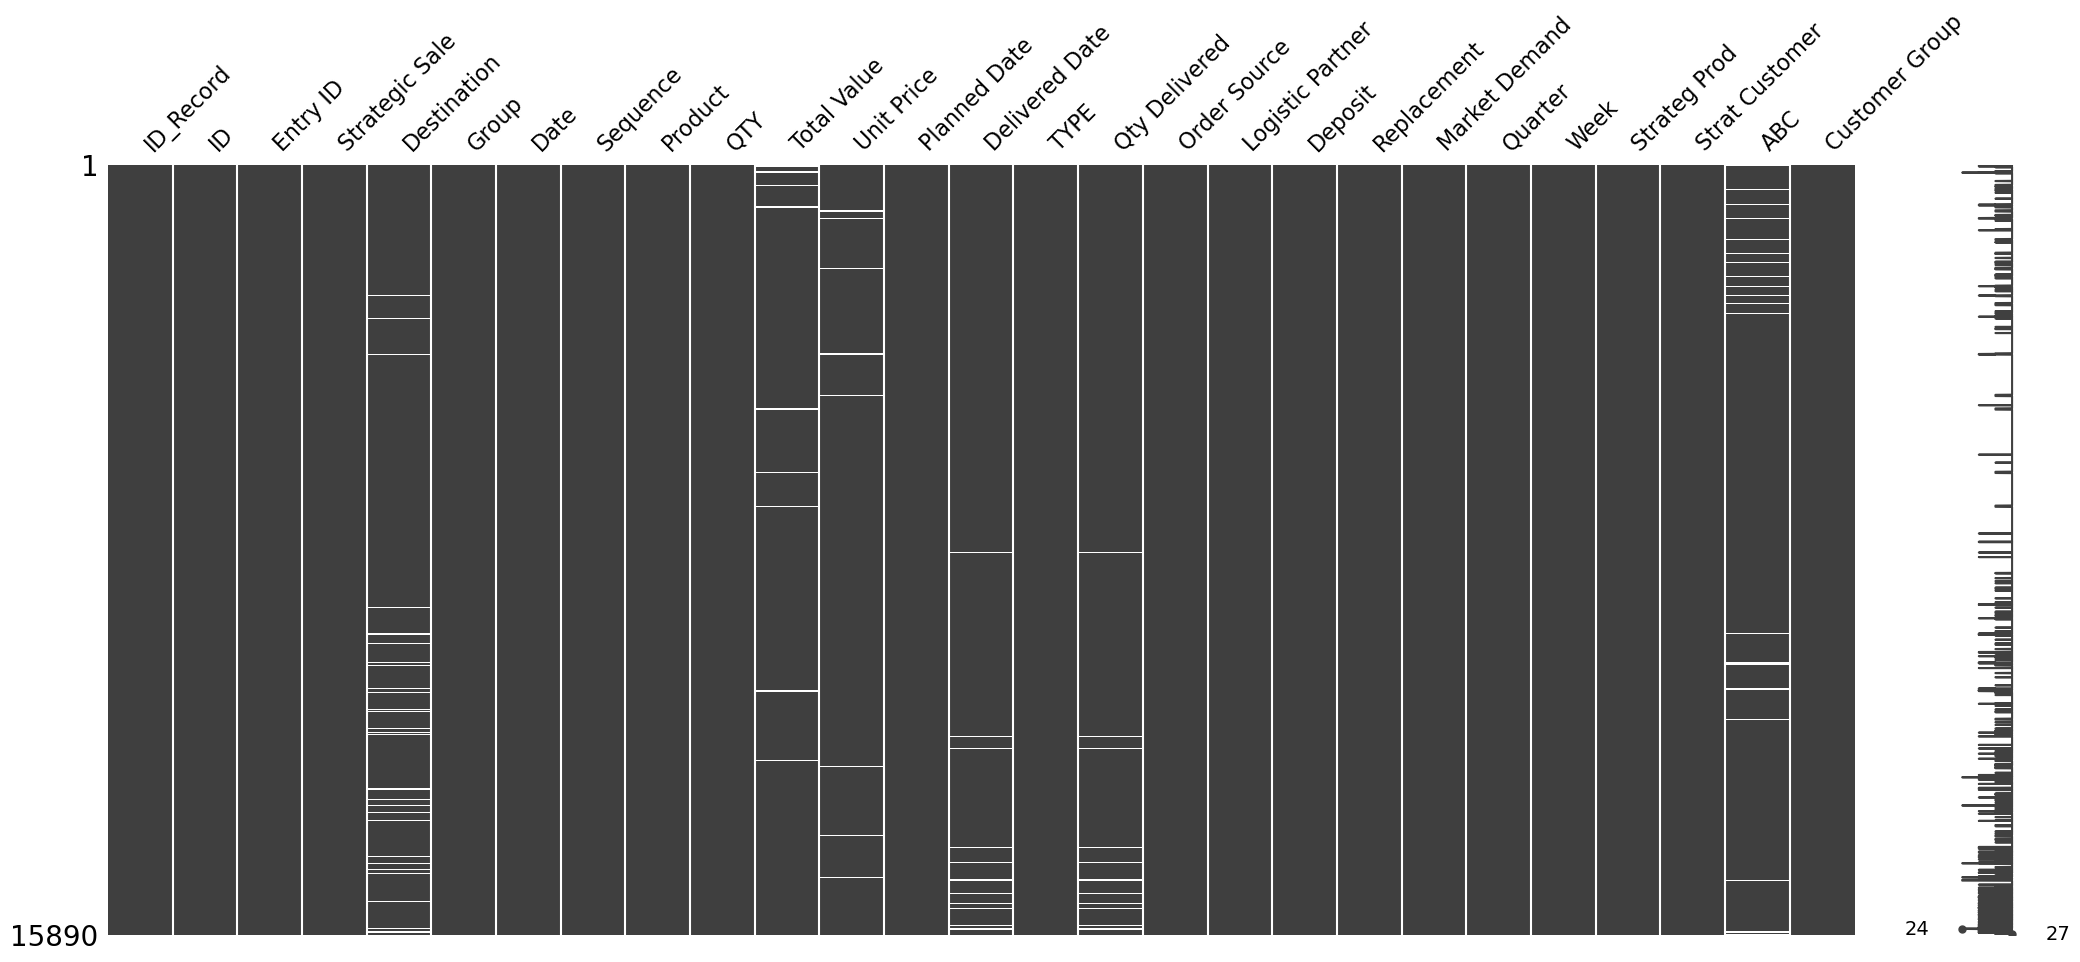

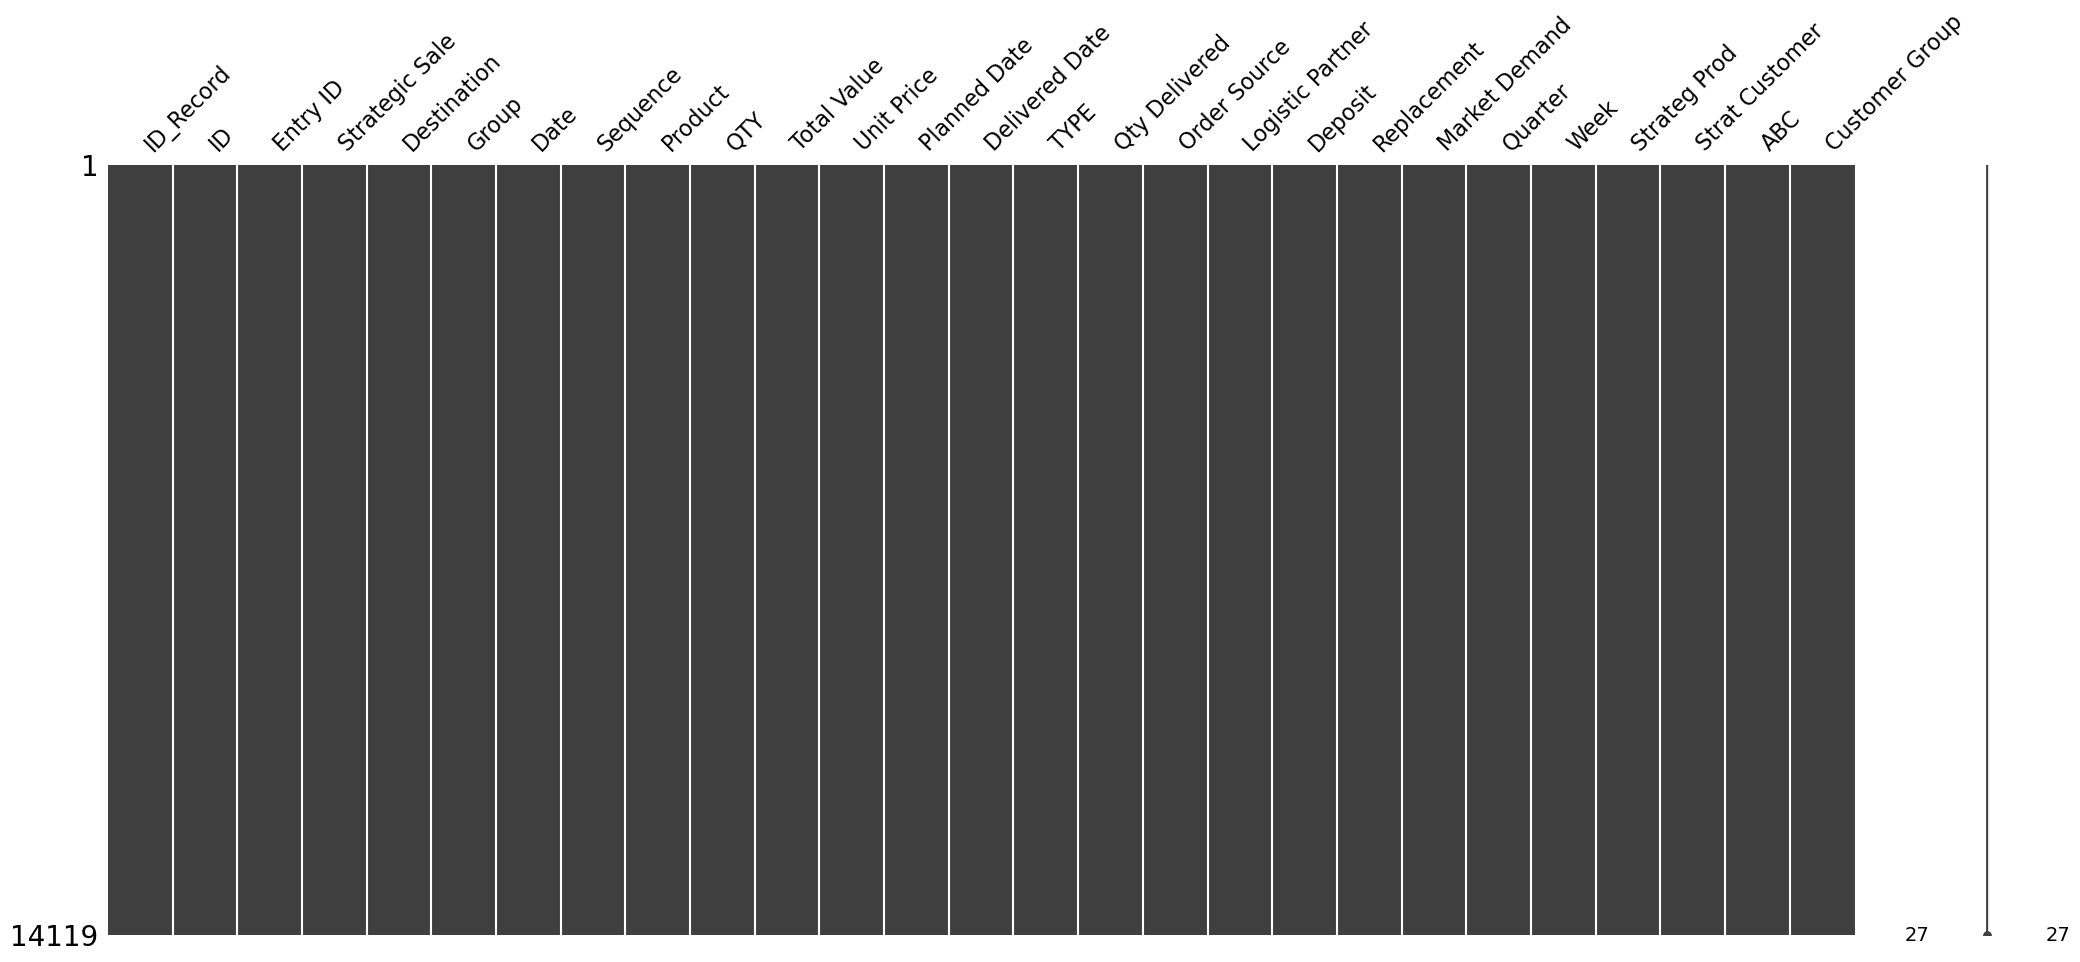

In [35]:
msno.matrix(dataset_copy)
msno.matrix(dataset_clean)

In [36]:
# Counting zero values in each column
zero_counts = (dataset_clean == 0).sum()

#Counts of zero values in each column
print(zero_counts)

ID_Record               0
ID                      0
Entry ID                0
Strategic Sale       8114
Destination             0
Group                   0
Date                    0
Sequence                0
Product                 0
QTY                     0
Total Value             0
Unit Price              0
Planned Date            0
Delivered Date          0
TYPE                    0
Qty Delivered           0
Order Source            0
Logistic Partner        0
Deposit                 0
Replacement             0
Market Demand           0
Quarter                 0
Week                    0
Strateg Prod        14119
Strat Customer          0
ABC                     0
Customer Group          0
dtype: int64


In [37]:
dataset_clean.isnull().sum()

ID_Record           0
ID                  0
Entry ID            0
Strategic Sale      0
Destination         0
Group               0
Date                0
Sequence            0
Product             0
QTY                 0
Total Value         0
Unit Price          0
Planned Date        0
Delivered Date      0
TYPE                0
Qty Delivered       0
Order Source        0
Logistic Partner    0
Deposit             0
Replacement         0
Market Demand       0
Quarter             0
Week                0
Strateg Prod        0
Strat Customer      0
ABC                 0
Customer Group      0
dtype: int64

In [38]:
### date treatment 
dataset_clean['Planned Date'] = pd.to_datetime(dataset_clean['Planned Date'])
dataset_clean['Date'] = pd.to_datetime(dataset_clean['Date'])
dataset_clean['Delivered Date'] = pd.to_datetime(dataset_clean['Delivered Date'])

/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_22139/3584929342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Planned Date'] = pd.to_datetime(dataset_clean['Planned Date'])
/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_22139/3584929342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Date'] = pd.to_datetime(dataset_clean['Date'])
/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_22139/3584929342.py:4: SettingWithCopyWarning: 
A value i

In [45]:
dataset_clean.dtypes

ID_Record                    int64
ID                           int64
Entry ID                     int64
Strategic Sale               int64
Destination                 object
Group                        int64
Date                datetime64[ns]
Sequence                     int64
Product                      int64
QTY                        float64
Total Value                float64
Unit Price                 float64
Planned Date        datetime64[ns]
Delivered Date      datetime64[ns]
TYPE                        object
Qty Delivered              float64
Order Source                object
Logistic Partner            object
Deposit                     object
Replacement                 object
Market Demand                int64
Quarter                     object
Week                         int64
Strateg Prod                 int64
Strat Customer              object
ABC                         object
Customer Group               int64
dtype: object

In [52]:
### Values treatment 
dataset_clean['Total Value '] = dataset_clean['Total Value '].astype(str)
dataset_clean['Total Value '] = dataset_clean['Total Value '].str.replace('$', '').str.replace(',', '')
dataset_clean['Total Value '] = dataset_clean['Total Value '].astype(float)

/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_22139/2924636922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_clean['Total Value '] = dataset_clean['Total Value '].astype(str)
/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_22139/2924636922.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset_clean['Total Value '] = dataset_clean['Total Value '].str.replace('$', '').str.replace(',', '')
/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_22139/2924636922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [54]:
dataset_clean = pd.DataFrame(dataset_clean)

In [88]:
# Replace zero values with NaN - Strategic Sale
dataset_clean['Strategic Sale'].replace(0, np.nan, inplace=True)

# Calculate the overall mean excluding NaN values
overall_mean = dataset_clean['Strategic Sale'].mean()

# Fill NaN values with the overall mean
dataset_clean['Strategic Sale'].fillna(overall_mean, inplace=True)

In [89]:
# Replace zero values with NaN - Strateg Prod
dataset_clean['Strateg Prod'].replace(0, np.nan, inplace=True)

# Calculate the overall mean excluding NaN values
up_overall_mean = dataset_clean['Strateg Prod'].mean()

# Fill NaN values with the overall mean
dataset_clean['Strateg Prod'].fillna(up_overall_mean, inplace=True)

In [73]:
# Counting zero values in each column
zero_counts = (dataset_clean == 0).sum()

#Counts of zero values in each column
print(zero_counts)

ID_Record           0
ID                  0
Entry ID            0
Strategic Sale      0
Destination         0
Group               0
Date                0
Sequence            0
Product             0
QTY                 0
Total Value         0
Unit Price          0
Planned Date        0
Delivered Date      0
TYPE                0
Qty Delivered       0
Order Source        0
Logistic Partner    0
Deposit             0
Replacement         0
Market Demand       0
Quarter             0
Week                0
Strateg Prod        0
Strat Customer      0
ABC                 0
Customer Group      0
dtype: int64


In [74]:
dataset_clean['ABC'].unique

<bound method Series.unique of 2        C
3        C
4        C
5        C
6        C
        ..
15861    C
15862    B
15863    C
15864    C
15865    A
Name: ABC, Length: 14119, dtype: object>

In [75]:
sorted_unique_values = np.sort(dataset_clean['ABC'].unique())
print(sorted_unique_values)

['A' 'B' 'C']


In [90]:
# Assuming dataset_clean is your DataFrame containing numerical columns
numerical_columns = dataset_clean.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix_num = numerical_columns.corr()
correlation_matrix_num

,ID_Record,ID,Entry ID,Strategic Sale,Group,Sequence,Product,QTY,Total Value,Unit Price,Qty Delivered,Market Demand,Week,Strateg Prod,Customer Group
ID_Record,1.000000,0.000594,0.955413,NaN,0.127075,-0.024313,0.144376,0.002301,-0.002243,-0.017186,0.002301,0.032437,0.141555,NaN,0.024722
ID,0.000594,1.000000,-0.003817,NaN,0.093181,0.120565,0.028226,-0.088144,-0.058195,-0.048116,-0.088144,0.755218,-0.024012,NaN,0.669408
Entry ID,0.955413,-0.003817,1.000000,NaN,0.133960,-0.026910,0.144218,-0.025112,-0.017254,-0.018124,-0.025112,0.030068,0.135745,NaN,0.022984
Strategic Sale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Group,0.127075,0.093181,0.133960,NaN,1.000000,-0.012245,0.385862,-0.061841,-0.053954,-0.147798,-0.061841,0.110817,-0.004922,NaN,0.083496
Sequence,-0.024313,0.120565,-0.026910,NaN,-0.012245,1.000000,0.034569,-0.016817,-0.005139,0.000045,-0.016817,-0.247517,-0.039440,NaN,-0.100968
Product,0.144376,0.028226,0.144218,NaN,0.385862,0.034569,1.000000,-0.066178,-0.054207,-0.178521,-0.066178,0.039993,-0.024654,NaN,0.037412
QTY,0.002301,-0.088144,-0.025112,NaN,-0.061841,-0.016817,-0.066178,1.000000,0.683918,0.016397,1.000000,-0.065302,0.002288,NaN,-0.046412
Total Value,-0.002243,-0.058195,-0.017254,NaN,-0.053954,-0.005139,-0.054207,0.683918,1.000000,0.183622,0.683918,-0.040251,0.006043,NaN,-0.031119
Unit Price,-0.017186,-0.048116,-0.018124,NaN,-0.147798,0.000045,-0.178521,0.016397,0.183622,1.000000,0.016397,-0.055578,0.012157,NaN,-0.038099


In [93]:
#Calculate Statistical Measures
correlations = dataset_clean.corr()
print(correlations)

                ID_Record        ID  Entry ID  Strategic Sale     Group  \
ID_Record        1.000000  0.000594  0.955413             NaN  0.127075   
ID               0.000594  1.000000 -0.003817             NaN  0.093181   
Entry ID         0.955413 -0.003817  1.000000             NaN  0.133960   
Strategic Sale        NaN       NaN       NaN             NaN       NaN   
Group            0.127075  0.093181  0.133960             NaN  1.000000   
Sequence        -0.024313  0.120565 -0.026910             NaN -0.012245   
Product          0.144376  0.028226  0.144218             NaN  0.385862   
QTY              0.002301 -0.088144 -0.025112             NaN -0.061841   
Total Value     -0.002243 -0.058195 -0.017254             NaN -0.053954   
Unit Price      -0.017186 -0.048116 -0.018124             NaN -0.147798   
Qty Delivered    0.002301 -0.088144 -0.025112             NaN -0.061841   
Market Demand    0.032437  0.755218  0.030068             NaN  0.110817   
Week             0.141555

/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_22139/166409189.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = dataset_clean.corr()


In [94]:
#Encoding 
#Encode all the object and convert as categories

catcol = dataset_clean.select_dtypes(include=['object']).columns

In [95]:
catcol

Index(['Destination', 'TYPE', 'Order Source', 'Logistic Partner', 'Deposit',
       'Replacement', 'Quarter', 'Strat Customer', 'ABC'],
      dtype='object')

In [96]:
dataset_cat = dataset_clean.copy()

In [97]:
for col in catcol:
    dataset_cat[col] = dataset_cat[col].astype('category').cat.codes

In [99]:
dataset_cat

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,QTY,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
2,3,1320,18072,NaN,9,2,2021-06-26,77,4440,39.0,214.20,5.492308,2021-06-26,2023-07-02,1,30.0,1,8,11,0,3,3,1,NaN,0,2,3986
3,4,340,18181,NaN,12,2,2021-08-02,11,4440,80.6,442.68,5.492308,2021-08-02,2023-08-16,1,62.0,1,5,5,0,1,2,9,NaN,0,2,684
4,5,1100,18335,NaN,2,7,2021-09-13,2,4481,325.0,622.50,1.915385,2023-07-16,2023-07-09,1,250.0,1,8,11,0,3,3,12,NaN,0,2,521
5,6,1320,18378,NaN,9,2,2021-09-27,31,4440,650.0,3570.00,5.492308,2023-08-12,2023-08-20,1,500.0,1,8,11,0,3,0,4,NaN,0,2,3986
6,7,1320,18397,NaN,9,2,2021-10-04,1,4452,128.7,1906.74,14.815385,2021-11-20,2023-05-21,1,99.0,1,8,11,0,3,2,10,NaN,0,2,3986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15861,15862,1320,19418,NaN,9,2,2022-10-04,1,4440,6.5,35.70,5.492308,2022-10-04,2023-04-18,1,5.0,1,9,10,1,3,2,7,NaN,0,2,3986
15862,15863,340,19418,NaN,12,21,2022-10-04,1,4493,11.7,28.80,2.461538,2022-10-04,2023-02-22,1,9.0,1,5,5,0,1,2,12,NaN,0,1,684
15863,15864,1320,19418,NaN,9,2,2022-10-05,2,4440,195.0,1071.00,5.492308,2022-10-05,2023-03-28,1,150.0,1,9,10,1,3,2,7,NaN,0,2,3986
15864,15865,1320,19420,NaN,9,14,2022-10-22,2,4468,14.3,89.54,6.261538,2022-10-22,2023-01-01,1,11.0,1,8,11,0,3,2,2,NaN,0,2,3986


In [102]:
ModelSelect = SelectKBest(score_func = f_classif, k = 'all')

In [104]:
print(dataset_cat.dtypes)

ID_Record                    int64
ID                           int64
Entry ID                     int64
Strategic Sale             float64
Destination                   int8
Group                        int64
Date                datetime64[ns]
Sequence                     int64
Product                      int64
QTY                        float64
Total Value                float64
Unit Price                 float64
Planned Date        datetime64[ns]
Delivered Date      datetime64[ns]
TYPE                          int8
Qty Delivered              float64
Order Source                  int8
Logistic Partner              int8
Deposit                       int8
Replacement                   int8
Market Demand                int64
Quarter                       int8
Week                         int64
Strateg Prod               float64
Strat Customer                int8
ABC                           int8
Customer Group               int64
dtype: object


In [105]:
df_encoded = dataset_cat.copy()

In [106]:
corr_matrix = df_encoded.corr()

/var/folders/7r/rs48kvt11nb366b4wwn6gtyc0000gn/T/ipykernel_22139/1784078817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()


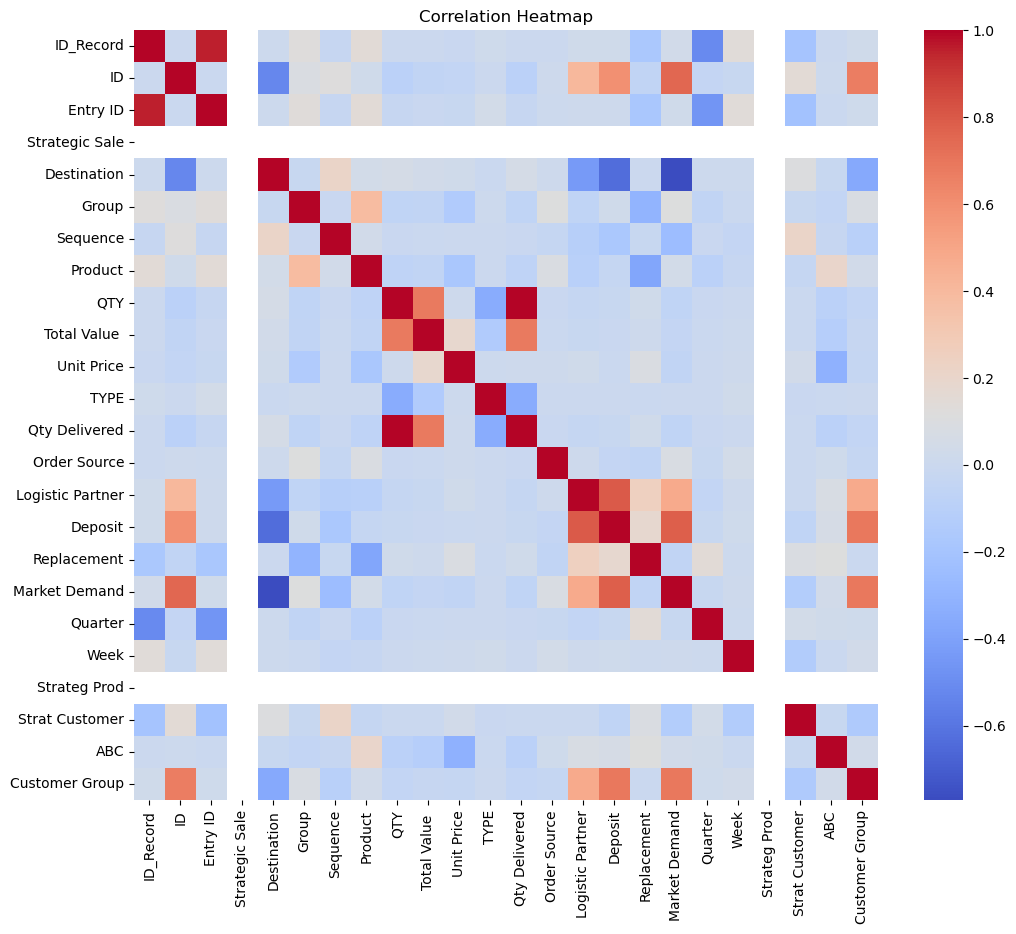

In [108]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

In [110]:

#Select only numeric columns
current_scenario_df = df_encoded.select_dtypes(include=[np.number])

#Save the final prepared dataset to a CSV file
current_scenario_df.to_csv('current_scenario_df.csv', index=False)